<a href="https://colab.research.google.com/github/Vaisakh-Babu/pandas_practice/blob/master/covid19India_practice_data_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install covid19pandas
import covid19pandas as cvd

In [44]:
df = cvd.get_data_jhu()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


In [45]:
df

,date,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,cases,deaths,recovered
0,2020-01-22,4.0,AF,AFG,4.0,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0,0,0,0
1,2020-01-22,8.0,AL,ALB,8.0,NaN,Albania,41.153300,20.168300,Albania,2877800.0,0,0,0
2,2020-01-22,12.0,DZ,DZA,12.0,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0,0,0,0
3,2020-01-22,20.0,AD,AND,20.0,NaN,Andorra,42.506300,1.521800,Andorra,77265.0,0,0,0
4,2020-01-22,24.0,AO,AGO,24.0,NaN,Angola,-11.202700,17.873900,Angola,32866268.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33637,2020-05-26,275.0,PS,PSE,275.0,NaN,West Bank and Gaza,31.952200,35.233200,WestBankandGaza,5101416.0,429,3,365
33638,2020-05-26,732.0,EH,ESH,732.0,NaN,Western Sahara,24.215500,-12.885800,WesternSahara,597330.0,9,1,6
33639,2020-05-26,887.0,YE,YEM,887.0,NaN,Yemen,15.552727,48.516388,Yemen,29825968.0,249,49,10
33640,2020-05-26,894.0,ZM,ZMB,894.0,NaN,Zambia,-13.133897,27.849332,Zambia,18383956.0,920,7,336


In [0]:
india = df.query('`Country/Region` == "India"')

In [47]:
india.tail()

,date,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,cases,deaths,recovered
32451,2020-05-22,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,124794,3726,51824
32718,2020-05-23,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,131423,3868,54385
32985,2020-05-24,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,138536,4024,57692
33252,2020-05-25,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,144950,4172,60706
33519,2020-05-26,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,150793,4344,64277


In [48]:
india['Population'][33519]/india['cases'][33519]

9151.647523426154

In [0]:
india = cvd.calc_daily_change(india,'cases','Country/Region' )

In [0]:
india = cvd.calc_daily_change(india,'deaths','Country/Region' )
india = cvd.calc_daily_change(india,'recovered','Country/Region' )

In [51]:
india

,date,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,cases,deaths,recovered,daily_cases,daily_deaths,daily_recovered
0,2020-01-22,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,0,0,0,0,0,0
1,2020-01-23,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,0,0,0,0,0,0
2,2020-01-24,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,0,0,0,0,0,0
3,2020-01-25,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,0,0,0,0,0,0
4,2020-01-26,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2020-05-22,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,124794,3726,51824,6568,142,3271
122,2020-05-23,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,131423,3868,54385,6629,142,2561
123,2020-05-24,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,138536,4024,57692,7113,156,3307
124,2020-05-25,356.0,IN,IND,356.0,NaN,India,20.593684,78.96288,India,1.380004e+09,144950,4172,60706,6414,148,3014


In [0]:
del india['iso2']
del india['Province/State']
del india['iso3']
del india['code3']
del india['Lat']
del india['Long']
del india['UID']
del india['Country/Region']
del india['Combined_Key']

In [57]:
india

,date,Population,cases,deaths,recovered,daily_cases,daily_deaths,daily_recovered
0,2020-01-22,1.380004e+09,0,0,0,0,0,0
1,2020-01-23,1.380004e+09,0,0,0,0,0,0
2,2020-01-24,1.380004e+09,0,0,0,0,0,0
3,2020-01-25,1.380004e+09,0,0,0,0,0,0
4,2020-01-26,1.380004e+09,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
121,2020-05-22,1.380004e+09,124794,3726,51824,6568,142,3271
122,2020-05-23,1.380004e+09,131423,3868,54385,6629,142,2561
123,2020-05-24,1.380004e+09,138536,4024,57692,7113,156,3307
124,2020-05-25,1.380004e+09,144950,4172,60706,6414,148,3014


In [56]:
india['Population'][0] - india['Population'][125]

0.0

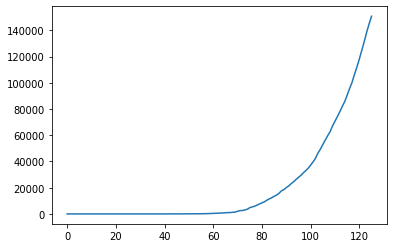

In [66]:
india.cases.plot()

In [0]:
import matplotlib.pyplot as plt

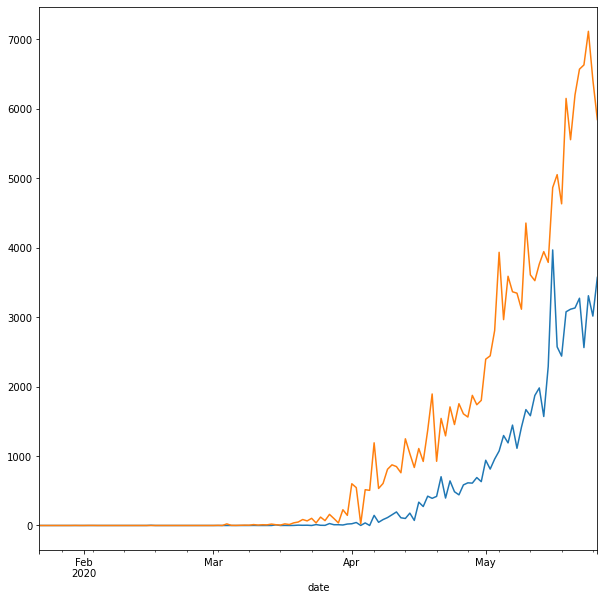

In [101]:
plt.figure(figsize = (10,10))
india.set_index('date').daily_recovered.plot()
india.set_index('date').daily_cases.plot()
plt.show()